# Exploratory Data Analysis (EDA)

## Project: E-commerce Product Delivery Prediction

- Exploratory Data Analysis (EDA) on the cleaned dataset.
- Understand data distributions, relationships between features, and their impact on product delivery timeliness.

### The purpose of EDA is to:
- Understand the structure of the dataset
- Identify patterns and trends
- Analyze relationships between features and the target variable
- Generate insights that will guide preprocessing and model building

⚠️ Note: No data transformation, encoding, or scaling is performed in this step.


## Import Libraries

In [3]:
# Install matplotlib seaborn
%pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install seaborn

# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
## Load the clean dataset
df = pd.read_csv(r'D:\E-Commerce Product Prediction\E-Commerce_product\data\e_commerce_cleaned.csv')

# Display first 5 rows
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [6]:
# Data Shape (rows, columns)
df.shape

(10999, 12)

In [7]:
# Data information: data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
# Statistical summery of numerical features
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


### Observations
- The dataset contains both numerical and categorical features.
- No further structural issues are observed at this stage.
- Summary statistics provide a high-level understanding of feature ranges.


In [9]:
# Target veriable distribution
df['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

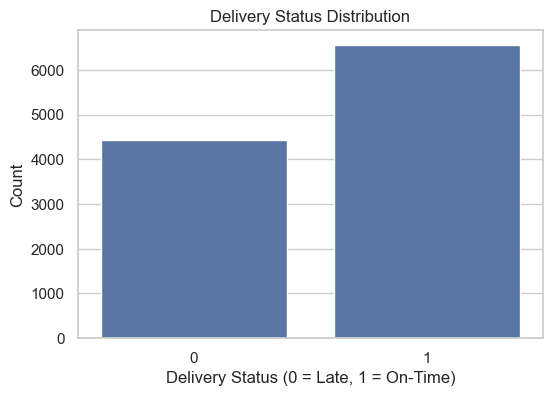

In [10]:
# Visualize target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Reached.on.Time_Y.N', data=df)
plt.title("Delivery Status Distribution")
plt.xlabel("Delivery Status (0 = Late, 1 = On-Time)")
plt.ylabel("Count")
plt.show()

### Target Variable Insight
- This is a **binary classification problem**.
- Class distribution is checked to identify potential imbalance.


In [11]:
# Select numerical columns
numerical_cols = df.select_dtypes(include = ['int64', 'float64']).columns

numerical_cols

Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

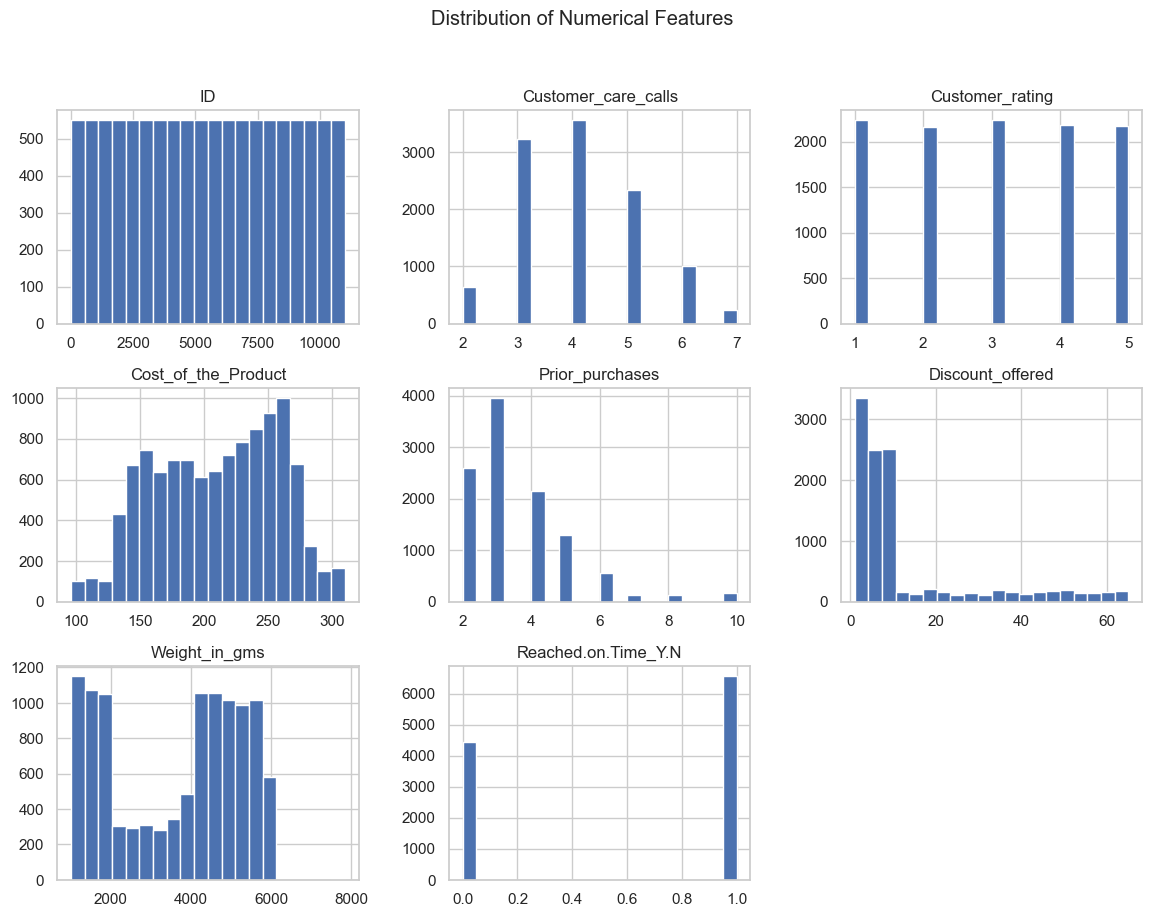

In [12]:
# Histogram for numerical features
df[numerical_cols].hist(figsize=(14,10), bins=20)
plt.suptitle("Distribution of Numerical Features")
plt.show()


### Univariate Analysis Insights
- Numerical features show varying distributions.
- Some features may contain skewness or extreme values.
- These observations will guide preprocessing decisions later.


In [13]:
# Average feature values grouped by delivery status
df.groupby('Reached.on.Time_Y.N')[numerical_cols].mean()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Reached.on.Time_Y.N,,,,,,,,
0,7090.479486,4.147656,2.967989,214.498647,3.670424,5.545987,4168.668395,0.0
1,4424.978364,3.991467,3.005790,207.289197,3.498095,18.663721,3272.640104,1.0


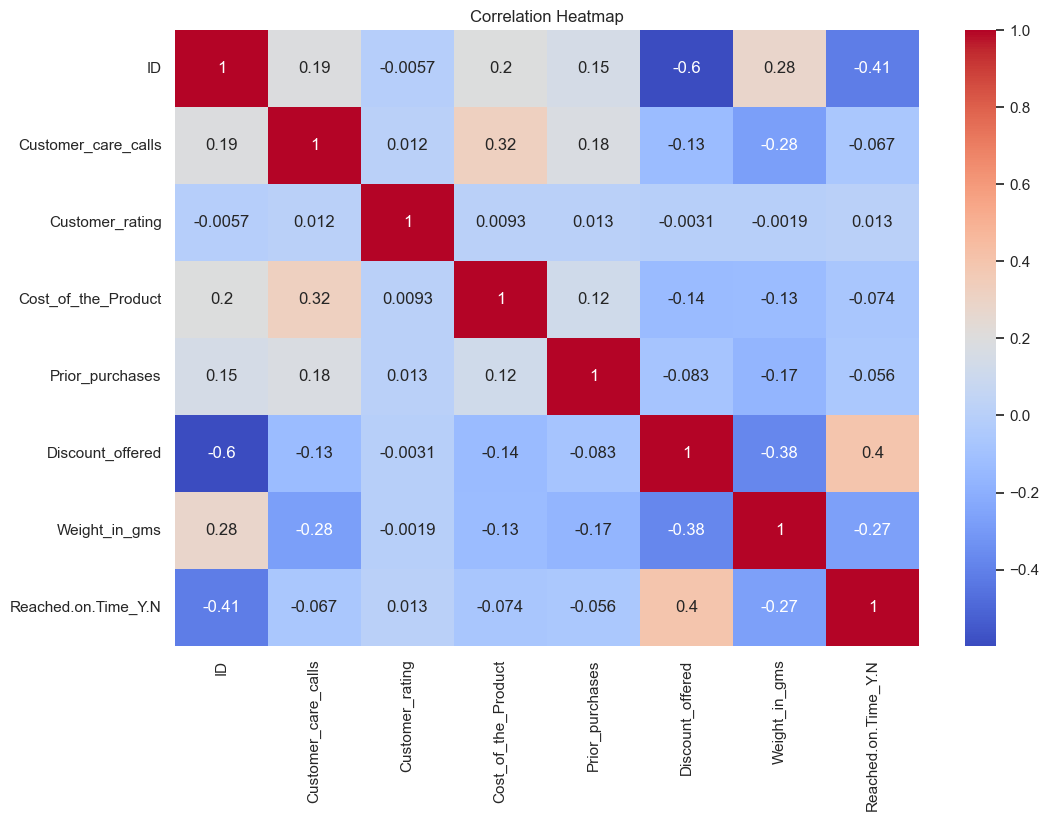

In [14]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Relationship Analysis
- Certain features show correlation with delivery status.
- Correlation insights help in feature selection and engineering.


## Key Insights from EDA

- The target variable indicates a binary classification problem.
- Some numerical features show noticeable differences between on-time and late deliveries.
- Correlation analysis helps identify features that may influence delivery performance.
- No preprocessing decisions are finalized at this stage; insights will guide the next phase.